### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
%%time

# load data in dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Wall time: 7 s


In [3]:
# Size and types of the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [4]:
#Exploring the train_data
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
df_train.shape

(188318, 132)

In [6]:
df_test.shape

(125546, 131)

In [7]:
#Exploring the columns of data
df_train.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [8]:
df_test.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
       'cont12', 'cont13', 'cont14'],
      dtype='object', length=131)

### Data breakdown

In [10]:
# Separate features from Loss value in train dataset.

pd.set_option('display.max_columns',None)
loss = df_train['loss']
features = df_train.drop('loss', axis=1)

In [11]:
# Analyse stats on continuous features
features.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


### Exploratory Visualization

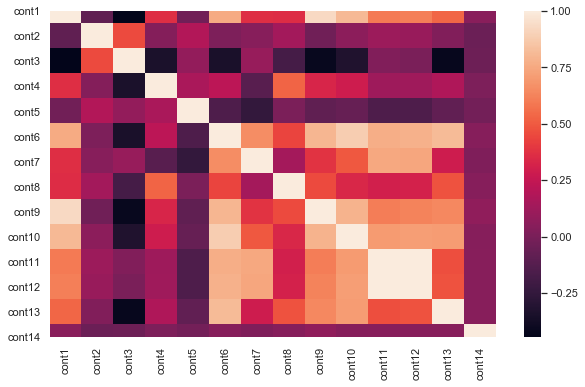

In [12]:
# Plot heat map to understand correlation between continous features 

plt.figure(figsize=(10, 6))
sns.set()
sns.heatmap(features.iloc[:,117:].corr())

Heatmap

To find out correlation among continuous feature. From the figure we can see lighter region in heatmap shows strong correlation and darker region depicts weaker correlation among feature. Features showing strong correlation are listed below.

- Cont11 and cont12
- Cont1 and cont9
- Cont6 and cont10
- Cont1 and cont10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216E47FD9C8>,
      dtype=object)

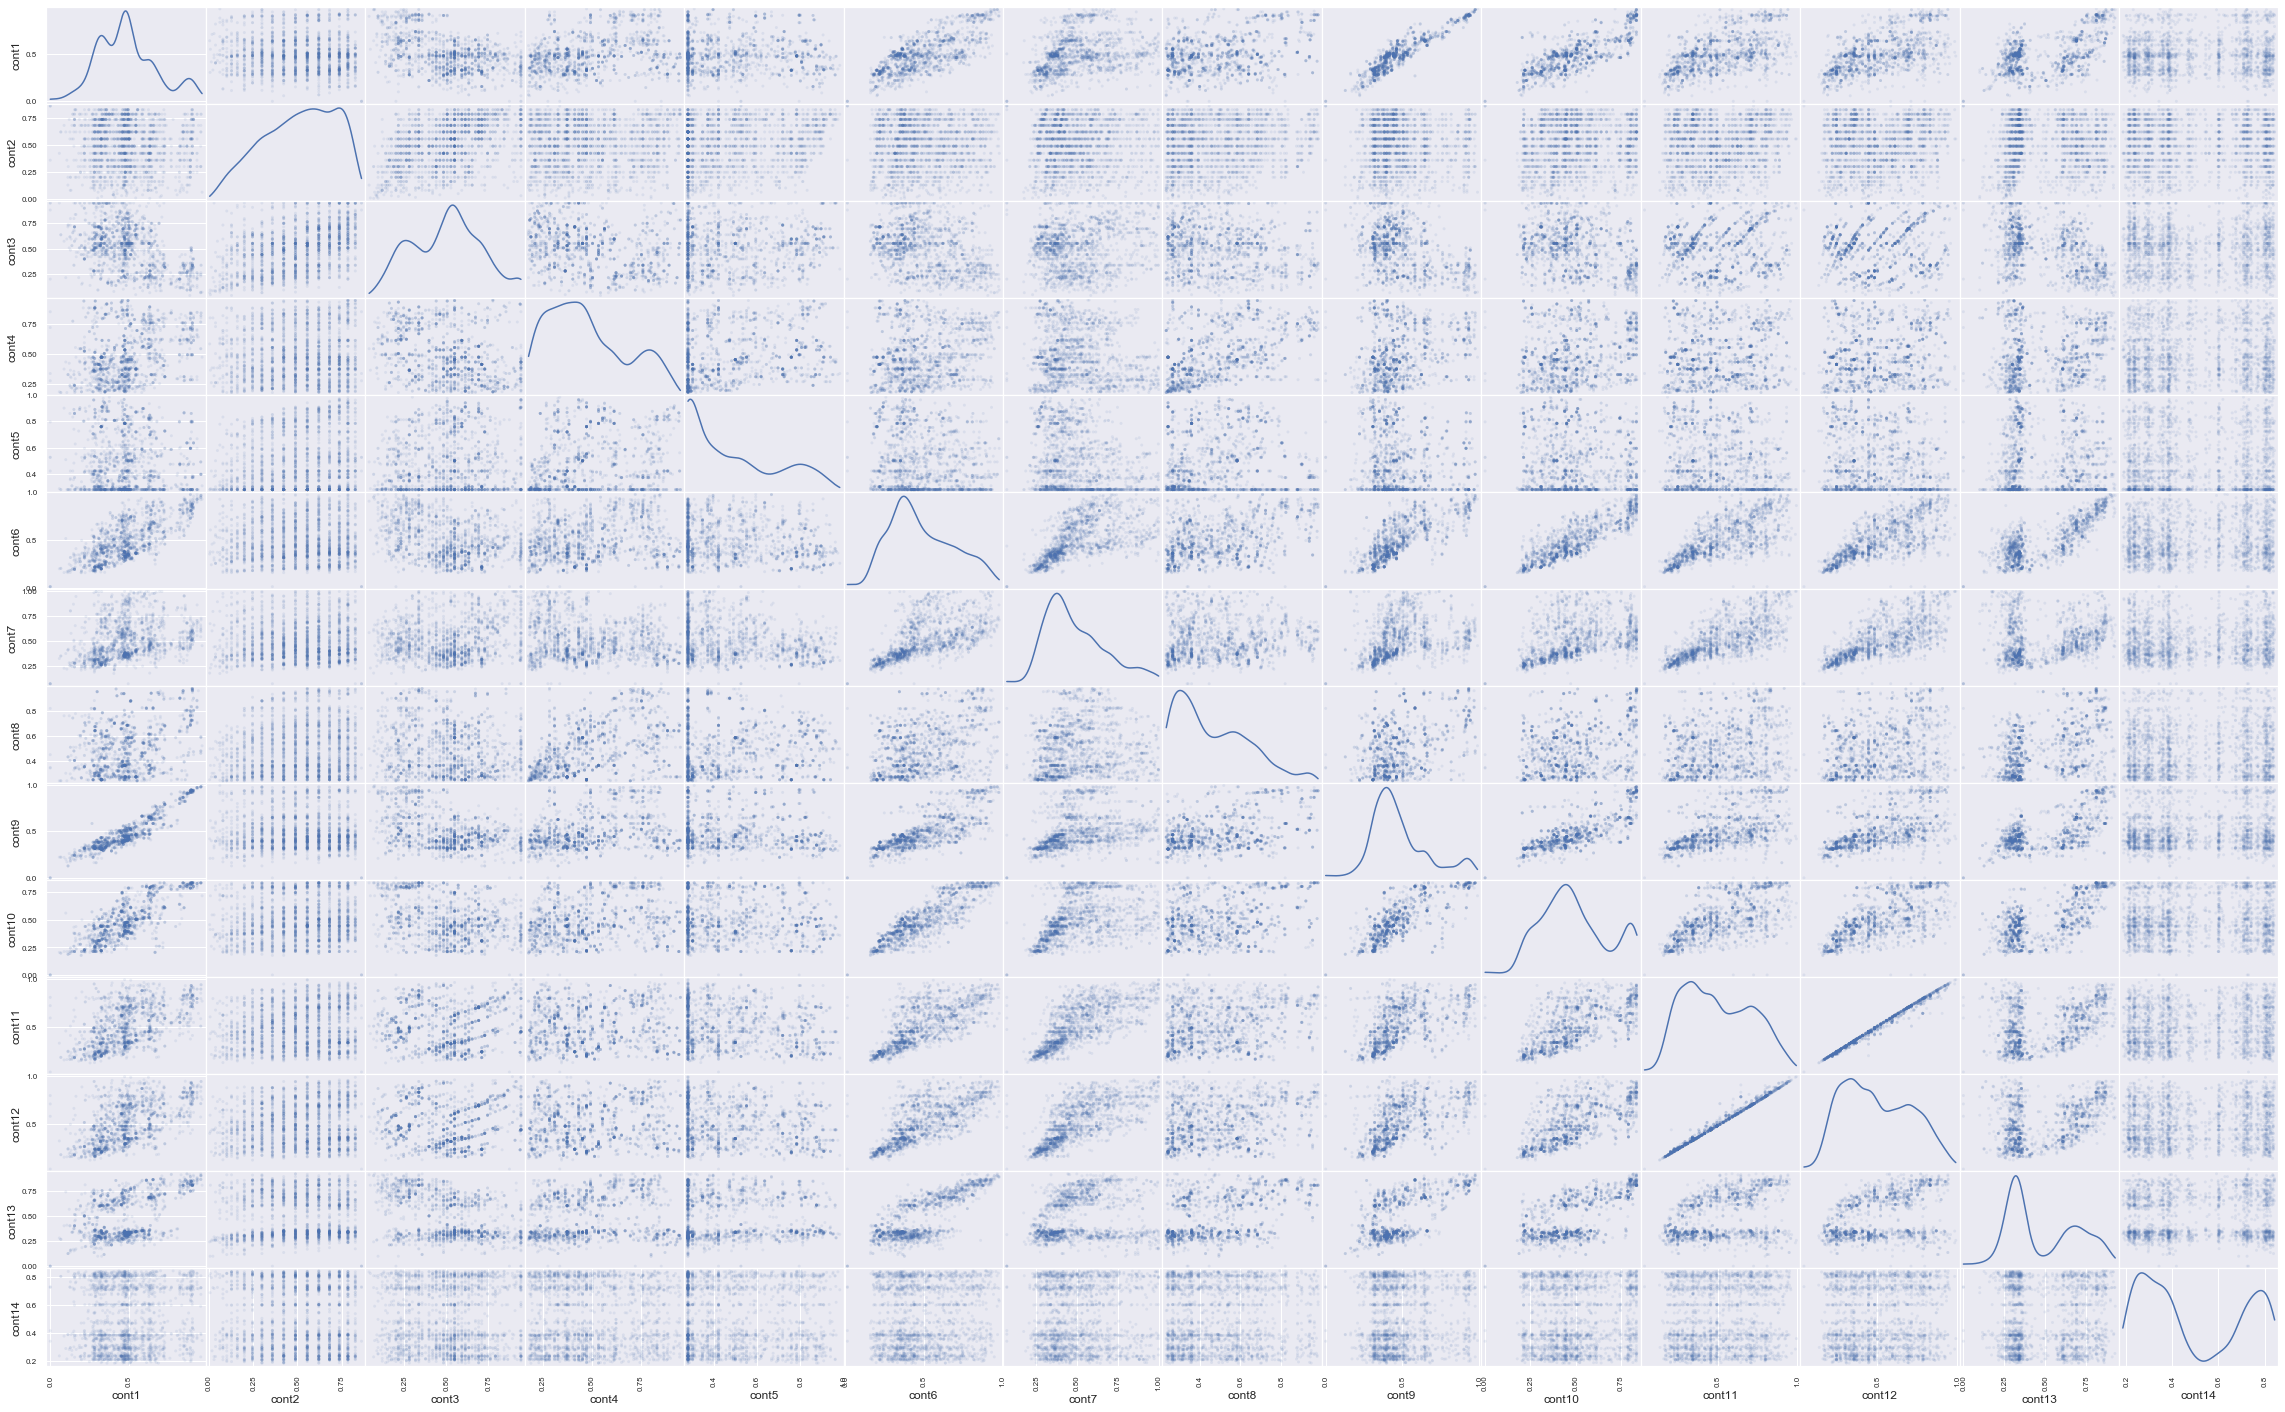

In [13]:
# Plot scatter plots to understand correlation between continuous features

pd.plotting.scatter_matrix(features.iloc[:2000,117:], alpha=0.1, figsize = (40,25), diagonal='kde')

Scatter Matrix

Scatter Matrix is plotted between each continuous features to review scatter plot distribution to understand data correlation and skewness. Here i have sampled first 2000 rows to review data distribution. Scatter plot visualization depicts similar correlations between features compared to what i discovered in heatmap visuals.

## Data Preprocessing

Hot encoding

Categorical variables will be one hot encoded to numeric values from string values as we can only input numeric values to model for training. One hot encoding is done through pandas get_dummies function which converts all categorical variable into one hot representation of numeric values. After hot encoding we observe 116 categorical features are converted into 1139 numeric features.

In [14]:
# Hot encode categorical features and review dimension of dataset after one hot encoding, 116 cat features are converted
# into 1139 + 14 cont features + 1 id feature = 1154 features  

features = pd.get_dummies(features)
print(features.shape)

(188318, 1154)


Seperating Categorical and Continuous feature
dropping the 'Id' column from dataframe since it of no use
Cat and Cont features are seperated so that we can perform feature transformation seperately on each of the dataset.

In [15]:
features = features.drop('id',axis=1)
cont_features = features.iloc[:,:14]
cat_features = features.iloc[:,14:]

In [17]:
from sklearn.decomposition import PCA

Principal Component Analysis on Continuous Features.

In [18]:

# PCA on continuous features

list = []
pca = PCA(n_components=11)
pca.fit(cont_features)
reduced_cont_feature = pca.transform(cont_features)
list.append(pca.explained_variance_ratio_)
print(list)

[array([0.42170992, 0.14249156, 0.11176714, 0.08600408, 0.06442122,
       0.05740309, 0.03954402, 0.02668232, 0.01976975, 0.01604432,
       0.00870777])]


Principal Component Analysis on categorical Features.

In [19]:
# Perform PCA for dimensionality reduction. Run PCA for number of components = total number of features after hot encoding to 
#understand explained variance ratio for all dimensions

list = []
pca = PCA(n_components=1139)
pca.fit(cat_features)
transformed_feature = pca.transform(cat_features)
list.append(pca.explained_variance_ratio_)

In [20]:
# Review explained variance and derive number of dimensions to be considered for 99% variance.  

np_list = np.array(list)
np.set_printoptions(threshold=1500)
print(np_list)

[[7.96106242e-02 7.00096200e-02 4.70303287e-02 3.77362005e-02
  3.30581939e-02 2.88104569e-02 2.74226770e-02 2.33783280e-02
  2.02456730e-02 1.83931801e-02 1.75700057e-02 1.64298833e-02
  1.53714602e-02 1.45657402e-02 1.37490646e-02 1.15876750e-02
  1.07745020e-02 1.03307611e-02 9.96816024e-03 9.38824098e-03
  9.23502134e-03 9.07904985e-03 8.72246741e-03 8.69815055e-03
  8.47485814e-03 8.31786465e-03 7.54830547e-03 7.36155031e-03
  7.20590565e-03 7.15115710e-03 7.02155353e-03 6.78591128e-03
  6.65965252e-03 6.28775173e-03 6.07048896e-03 5.82300958e-03
  5.79717698e-03 5.72363231e-03 5.17529781e-03 5.06072943e-03
  5.03575911e-03 4.94948273e-03 4.90831772e-03 4.75569553e-03
  4.51001193e-03 4.49523210e-03 4.28585044e-03 4.25227783e-03
  4.20677758e-03 4.10642313e-03 4.01568656e-03 3.94283184e-03
  3.89402403e-03 3.87446702e-03 3.79899893e-03 3.61997240e-03
  3.57561725e-03 3.51486439e-03 3.46872857e-03 3.43556358e-03
  3.35766089e-03 3.29943225e-03 3.28594951e-03 3.18548475e-03
  3.1639

In [21]:
list = []

pca = PCA(n_components=345)
pca.fit(cat_features)
reduced_cat_feature = pca.transform(cat_features)
list.append(pca.explained_variance_ratio_)
print(list)

[array([7.96106242e-02, 7.00096200e-02, 4.70303287e-02, 3.77362005e-02,
       3.30581939e-02, 2.88104569e-02, 2.74226770e-02, 2.33783280e-02,
       2.02456730e-02, 1.83931801e-02, 1.75700057e-02, 1.64298833e-02,
       1.53714602e-02, 1.45657402e-02, 1.37490646e-02, 1.15876750e-02,
       1.07745020e-02, 1.03307611e-02, 9.96816024e-03, 9.38824098e-03,
       9.23502134e-03, 9.07904985e-03, 8.72246741e-03, 8.69815055e-03,
       8.47485814e-03, 8.31786465e-03, 7.54830547e-03, 7.36155031e-03,
       7.20590565e-03, 7.15115710e-03, 7.02155353e-03, 6.78591128e-03,
       6.65965252e-03, 6.28775173e-03, 6.07048896e-03, 5.82300958e-03,
       5.79717698e-03, 5.72363231e-03, 5.17529781e-03, 5.06072943e-03,
       5.03575911e-03, 4.94948273e-03, 4.90831772e-03, 4.75569553e-03,
       4.51001193e-03, 4.49523210e-03, 4.28585044e-03, 4.25227783e-03,
       4.20677758e-03, 4.10642313e-03, 4.01568656e-03, 3.94283184e-03,
       3.89402403e-03, 3.87446702e-03, 3.79899893e-03, 3.61997240e-03,
     

In [22]:
# After PCA combine Cat and Cont features into single dataset.  
reduced_feature = np.hstack((reduced_cat_feature,reduced_cont_feature))
reduced_feature.shape

(188318, 356)

In [29]:
loss_log_bench = np.log(loss)
# Review data skewness. Log transform to get normal or uniform distribution.

print("data skewness before log transform {}".format(loss.skew()))
loss_log = np.log(loss+1)
print("data skewness after log transform {}".format(loss_log.skew()))

data skewness before log transform 3.7949583775378604
data skewness after log transform 0.0966195895031505


In [38]:
# Mean absolute error performance metric.
from sklearn.metrics import mean_absolute_error

def performance_metric(y_true, y_predict):
    mae = mean_absolute_error(y_true, y_predict) #Calculate the performance score between 'y_true' and 'y_predict'
    return mae

## Building model by using Keras

In [35]:
# Deep NN training using Keras 

#Import required libraries 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint  
from keras import optimizers

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
# Split the original data into train and test in ratio of 9:1 
X_train, X_test, y_train, y_test = train_test_split(reduced_feature, 
                                                    loss_log, 
                                                    test_size = 0.1, 
                                                    random_state = 0)

model = Sequential()

# First Dense Layer
model.add(Dense(356, input_dim=reduced_feature.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))

# Hidden Layer
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Initialize optimizer with lr
adam = optimizers.adam(lr=0.0001)

# Compile model
model.compile(loss='mean_absolute_error', optimizer=adam)

# Define model checkpoint with filepath to save trained params
checkpointer = ModelCheckpoint(filepath='weights.best.DeepNN.hdf5', 
                               verbose=1, save_best_only=True)

In [40]:
# Fit Train data with 10% data used for model inferencing. 
model.fit(X_train, y_train, 
          validation_split=0.1,
          epochs=50, batch_size=250, callbacks=[checkpointer], verbose=1)

# Load best weights from saved model checkpoint
model.load_weights('weights.best.DeepNN.hdf5')

# predict on test data
y_pred = model.predict(X_test)

Train on 152537 samples, validate on 16949 samples
Epoch 1/50
152537/152537 [==============================] - 10s 66us/step - loss: 0.4781 - val_loss: 0.4255

Epoch 00001: val_loss did not improve from 0.42511
Epoch 2/50
152537/152537 [==============================] - 9s 62us/step - loss: 0.4781 - val_loss: 0.4258

Epoch 00002: val_loss did not improve from 0.42511
Epoch 3/50
152537/152537 [==============================] - 10s 63us/step - loss: 0.4781 - val_loss: 0.4250

Epoch 00003: val_loss improved from 0.42511 to 0.42495, saving model to weights.best.DeepNN.hdf5
Epoch 4/50
152537/152537 [==============================] - 10s 63us/step - loss: 0.4755 - val_loss: 0.4251

Epoch 00004: val_loss did not improve from 0.42495
Epoch 5/50
152537/152537 [==============================] - 10s 63us/step - loss: 0.4745 - val_loss: 0.4255

Epoch 00005: val_loss did not improve from 0.42495
Epoch 6/50
152537/152537 [==============================] - 10s 63us/step - loss: 0.4743 - val_loss: 0.4

In [39]:
# Compute MAE from predicted and actual loss
print("Mean Absolute error: %.2f"
      % performance_metric(np.exp(y_test), np.exp(y_pred)))

Mean Absolute error: 1165.29


In [48]:
test_ids = df_test['id']

In [53]:
def save_predictions(ids = None, predictions = None, file = None):
    
    # prepare file
    submission = pd.DataFrame({'id': ids, 'loss': predictions})
    
    # CSV
    submission.to_csv(path_or_buf = file, index = False, encoding='utf8')
    print("Data prediction stored!")

In [54]:
save_predictions(ids = test_ids, 
                 predictions = predictions, 
                 file = 'keras_submission.csv')

Data prediction stored!
